<a href="https://colab.research.google.com/github/PrinceSiboniso/ACML-Adaptive-Computation-and-Machine-leaning-Project-and-/blob/main/SATwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd

# Load the dataset
df = pd.read_csv('combined_csv_file.csv')
print(df.head())

                                                link  \
0  https://twitter.com/zsimayi/status/18078363477...   
1  https://twitter.com/ristomsele64508/status/180...   
2  https://twitter.com/YakaFortune/status/1807858...   
3  https://twitter.com/BarakSiera/status/18078585...   
4  https://twitter.com/CMogoeng/status/1807825348...   

                                                text  \
0  I have a conspiracy theory: - the GP ANC negot...   
1  Most ANC members were forced to this GNU of DA...   
2  The ANC created this mess, it should have excl...   
3  DA didn't vote with ANC in Northern Cape. Lesu...   
4  May parliament open I can’t wait to see how th...   

                             user  likes  quotes  retweets  comments  \
0                Irvin Jim Slayer    165       7        54        29   
1                    MK/ EFF/ ATM      0       0         0         0   
2                     X_Analyst ⚖      0       0         0         0   
3                  Barak Siera💚🇿🇦     

In [167]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [168]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('combined_csv_file.csv')

# Drop rows with missing values in the "text" column
df = df.dropna(subset=['text'])
# Step 1: Preprocess the text column
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a valid string
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        # Remove mentions and hashtags
        text = re.sub(r'\@\w+|\#', '', text)
        # Remove special characters and numbers
        text = re.sub(r'[^A-Za-z\s]', '', text)
        return text.lower().strip()
    else:
        return ""  # Return an empty string for non-string entries

# Apply the preprocessing to the "text" column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Step 2: Convert the text to numerical form using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF result to a single column (as a dense representation)
df['tfidf_features'] = list(X_tfidf.toarray())

# Now df['tfidf_features'] contains the numerical representation of the "text" column as a single column
print("TF-IDF transformation completed and stored as a single column.")


TF-IDF transformation completed and stored as a single column.


In [169]:
print(df.head())


                                                link  \
0  https://twitter.com/zsimayi/status/18078363477...   
1  https://twitter.com/ristomsele64508/status/180...   
2  https://twitter.com/YakaFortune/status/1807858...   
3  https://twitter.com/BarakSiera/status/18078585...   
4  https://twitter.com/CMogoeng/status/1807825348...   

                                                text  \
0  I have a conspiracy theory: - the GP ANC negot...   
1  Most ANC members were forced to this GNU of DA...   
2  The ANC created this mess, it should have excl...   
3  DA didn't vote with ANC in Northern Cape. Lesu...   
4  May parliament open I can’t wait to see how th...   

                             user  likes  quotes  retweets  comments  \
0                Irvin Jim Slayer    165       7        54        29   
1                    MK/ EFF/ ATM      0       0         0         0   
2                     X_Analyst ⚖      0       0         0         0   
3                  Barak Siera💚🇿🇦     

In [170]:
# Drop the original columns
df = df.drop(columns=['user', 'text','link'])

# Check the DataFrame to confirm the columns have been dropped
print(df.head())


   likes  quotes  retweets  comments  Unnamed: 0  \
0    165       7        54        29         NaN   
1      0       0         0         0         NaN   
2      0       0         0         0         NaN   
3      0       0         0         0         NaN   
4     24       0         5         3         NaN   

                                        cleaned_text  \
0  i have a conspiracy theory  the gp anc negotia...   
1  most anc members were forced to this gnu of da...   
2  the anc created this mess it should have exclu...   
3  da didnt vote with anc in northern cape lesufi...   
4  may parliament open i cant wait to see how the...   

                                      tfidf_features  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.12119386046442182, 0.0, 0.0, 0.0, 0.0,...  


In [171]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the specified columns
scaled_columns = ['likes', 'quotes', 'retweets', 'comments']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Check the DataFrame to confirm the scaling
print(df.head())


      likes    quotes  retweets  comments  Unnamed: 0  \
0 -0.221600 -0.200991 -0.220443 -0.227892         NaN   
1 -0.224909 -0.210905 -0.228987 -0.237520         NaN   
2 -0.224909 -0.210905 -0.228987 -0.237520         NaN   
3 -0.224909 -0.210905 -0.228987 -0.237520         NaN   
4 -0.224428 -0.210905 -0.228196 -0.236524         NaN   

                                        cleaned_text  \
0  i have a conspiracy theory  the gp anc negotia...   
1  most anc members were forced to this gnu of da...   
2  the anc created this mess it should have exclu...   
3  da didnt vote with anc in northern cape lesufi...   
4  may parliament open i cant wait to see how the...   

                                      tfidf_features  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.12119386046442182, 0.0, 0.0, 0.0, 

In [172]:
pip install transformers pandas torch


In [173]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.utils.data import Dataset, DataLoader

# Load the tokenizer and model
model_name = "bert-base-uncased"  # Or use any misinformation-specific model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define the dataset class
class MisinformationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            max_length=self.max_len,
            add_special_tokens=True,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Step 1: Apply the classifier
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)

df['misinformation_label'] = df['cleaned_text'].apply(lambda text: classifier(text)[0]['label'])

# Step 2: Map the model output to 0 (not misinformation) or 1 (misinformation)
label_mapping = {"LABEL_0": 0, "LABEL_1": 1}  # Modify according to your model's output
df['misinformation_label'] = df['misinformation_label'].map(label_mapping)

# Step 3: Create the dataset
max_len = 128  # Set maximum token length
train_dataset = MisinformationDataset(df['cleaned_text'].tolist(), df['misinformation_label'].tolist(), tokenizer, max_len)

# Optionally, create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# View the labeled data
print(df[['cleaned_text', 'misinformation_label']].head(20))

# Save to CSV
df.to_csv('labeled_sa_twitter_dataset.csv', index=False)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                         cleaned_text  misinformation_label
0   i have a conspiracy theory  the gp anc negotia...                     0
1   most anc members were forced to this gnu of da...                     0
2   the anc created this mess it should have exclu...                     1
3   da didnt vote with anc in northern cape lesufi...                     0
4   may parliament open i cant wait to see how the...                     1
5                                        it dont slap                     1
6   imagine if the eff was part of that gnu the me...                     1
7   is anc in a coalition with da are you saying e...                     1
9   what is happening in gauteng could possibly a ...                     1
10  anc gp could be carrying a mandate to bring ab...                     0
11  i think most brown and black countries are we ...                     1
12  will be around forever  we will out live ramap...                     1
13  they bur

In [174]:
# View the entire DataFrame
print(df)

       likes    quotes  retweets  comments  Unnamed: 0  \
0  -0.221600 -0.200991 -0.220443 -0.227892         NaN   
1  -0.224909 -0.210905 -0.228987 -0.237520         NaN   
2  -0.224909 -0.210905 -0.228987 -0.237520         NaN   
3  -0.224909 -0.210905 -0.228987 -0.237520         NaN   
4  -0.224428 -0.210905 -0.228196 -0.236524         NaN   
..       ...       ...       ...       ...         ...   
90 -0.222042 -0.210905 -0.227247 -0.236856         NaN   
91 -0.224909 -0.210905 -0.228987 -0.237520         NaN   
92 -0.222743 -0.210905 -0.223291 -0.235860         NaN   
93 -0.224307 -0.210905 -0.227088 -0.236856         NaN   
94 -0.224889 -0.210905 -0.228829 -0.237520         NaN   

                                         cleaned_text  \
0   i have a conspiracy theory  the gp anc negotia...   
1   most anc members were forced to this gnu of da...   
2   the anc created this mess it should have exclu...   
3   da didnt vote with anc in northern cape lesufi...   
4   may parliament

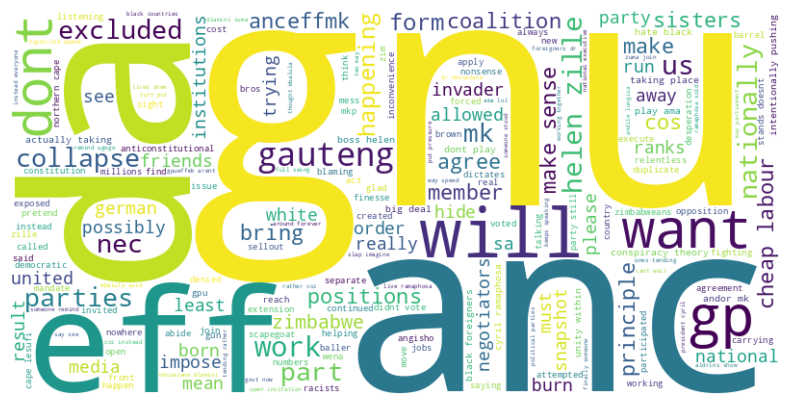

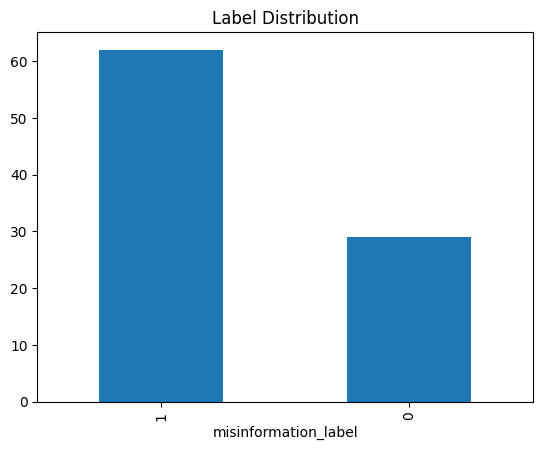

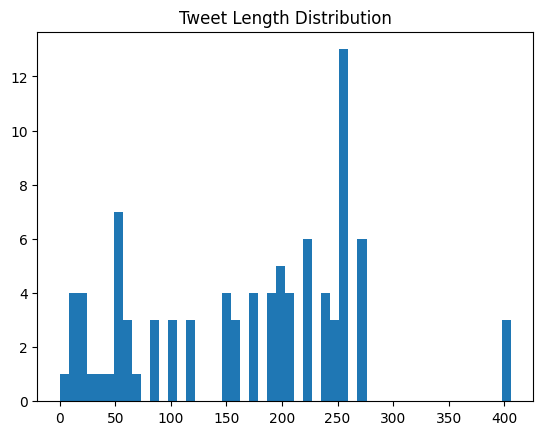

In [175]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Visualize word cloud of the text
all_text = ' '.join(df['cleaned_text'])  # Use df instead of X
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualize class distribution
df['misinformation_label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.show()

# Plot tweet lengths
df['tweet_length'] = df['cleaned_text'].apply(len)
plt.hist(df['tweet_length'], bins=50)
plt.title('Tweet Length Distribution')
plt.show()


In [176]:
!pip install spacy
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 9.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [177]:
df.head()

,likes,quotes,retweets,comments,Unnamed: 0,cleaned_text,tfidf_features,misinformation_label,tweet_length
0,-0.221600,-0.200991,-0.220443,-0.227892,NaN,i have a conspiracy theory the gp anc negotia...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,252
1,-0.224909,-0.210905,-0.228987,-0.237520,NaN,most anc members were forced to this gnu of da...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,56
2,-0.224909,-0.210905,-0.228987,-0.237520,NaN,the anc created this mess it should have exclu...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,259
3,-0.224909,-0.210905,-0.228987,-0.237520,NaN,da didnt vote with anc in northern cape lesufi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,269
4,-0.224428,-0.210905,-0.228196,-0.236524,NaN,may parliament open i cant wait to see how the...,"[0.0, 0.12119386046442182, 0.0, 0.0, 0.0, 0.0,...",1,259


In [178]:
# Try to drop 'Unnamed: 0' instead of 'Unnamed'
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.head()

,likes,quotes,retweets,comments,cleaned_text,tfidf_features,misinformation_label,tweet_length
0,-0.221600,-0.200991,-0.220443,-0.227892,i have a conspiracy theory the gp anc negotia...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,252
1,-0.224909,-0.210905,-0.228987,-0.237520,most anc members were forced to this gnu of da...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,56
2,-0.224909,-0.210905,-0.228987,-0.237520,the anc created this mess it should have exclu...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,259
3,-0.224909,-0.210905,-0.228987,-0.237520,da didnt vote with anc in northern cape lesufi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,269
4,-0.224428,-0.210905,-0.228196,-0.236524,may parliament open i cant wait to see how the...,"[0.0, 0.12119386046442182, 0.0, 0.0, 0.0, 0.0,...",1,259


In [179]:
#Data Visualization

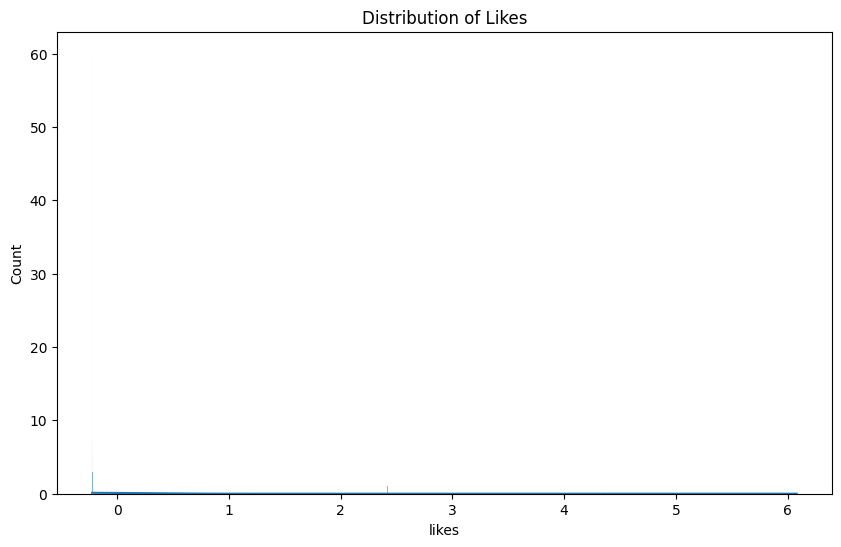

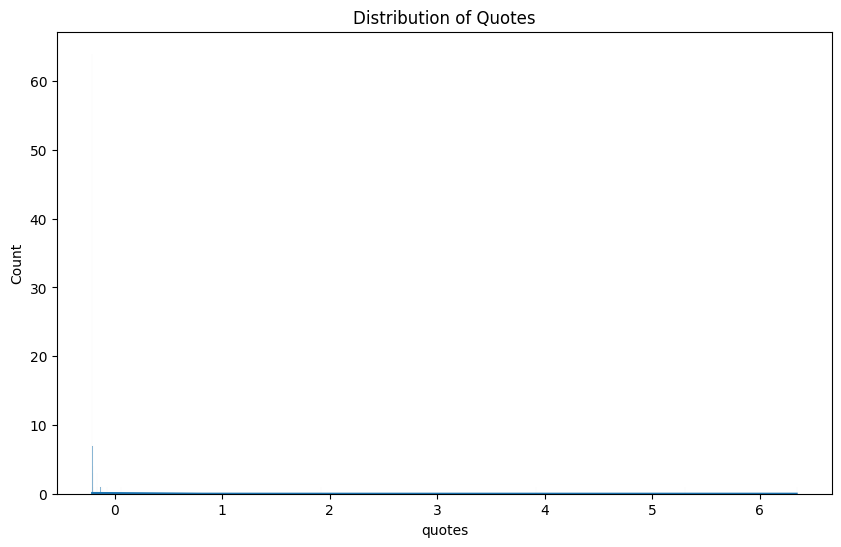

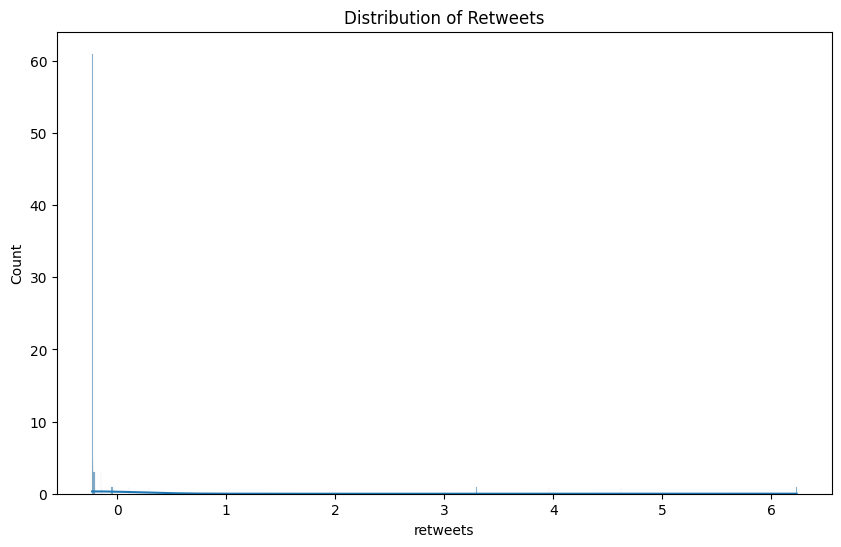

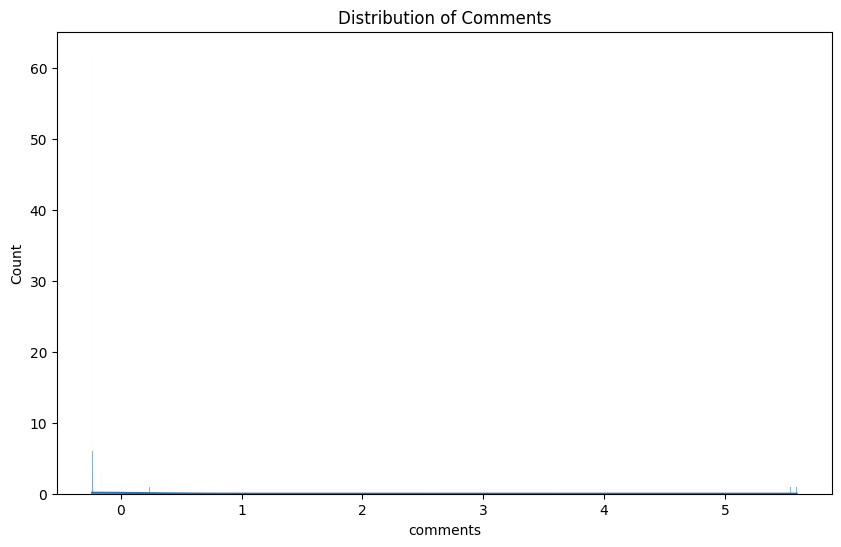

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='likes', kde=True)
plt.title('Distribution of Likes')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='quotes', kde=True)
plt.title('Distribution of Quotes')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='retweets', kde=True)
plt.title('Distribution of Retweets')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='comments', kde=True)
plt.title('Distribution of Comments')
plt.show()


In [181]:
# # Bar plots
# plt.figure(figsize=(12, 6))
# sns.countplot(y='text', data=df, order=df['text'].value_counts().index[:10])  # Show top 10 users
# plt.title('Distribution of Users (Top 10)')
# plt.xlabel('Count')
# plt.ylabel('User')
# plt.show()


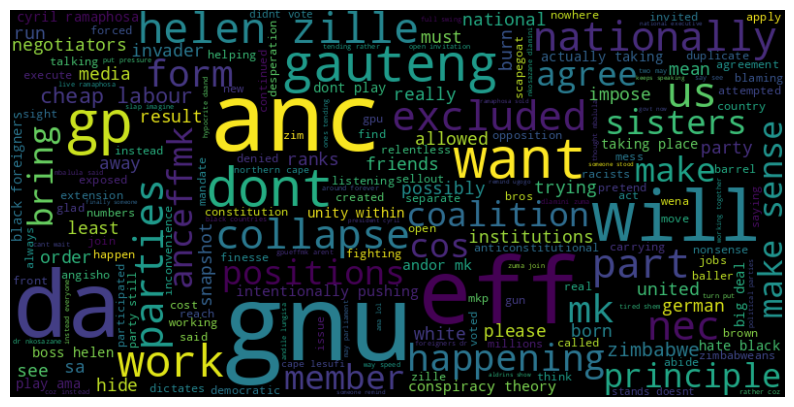

In [182]:
from wordcloud import WordCloud

# Generate the word cloud using the 'cleaned_text' column
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df['cleaned_text']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


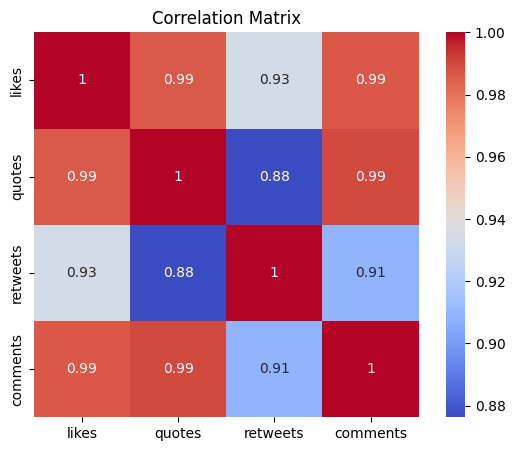

In [183]:
corr_matrix = df[['likes', 'quotes', 'retweets', 'comments']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


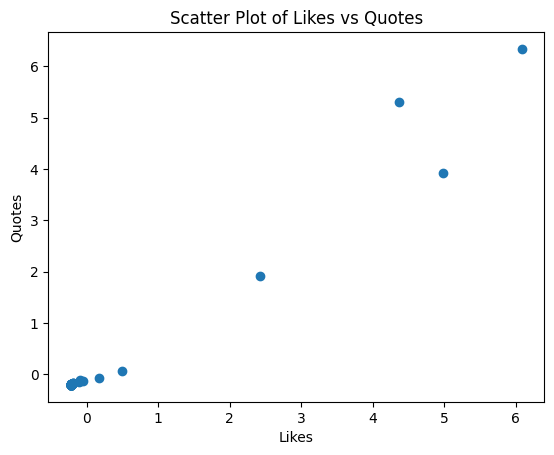

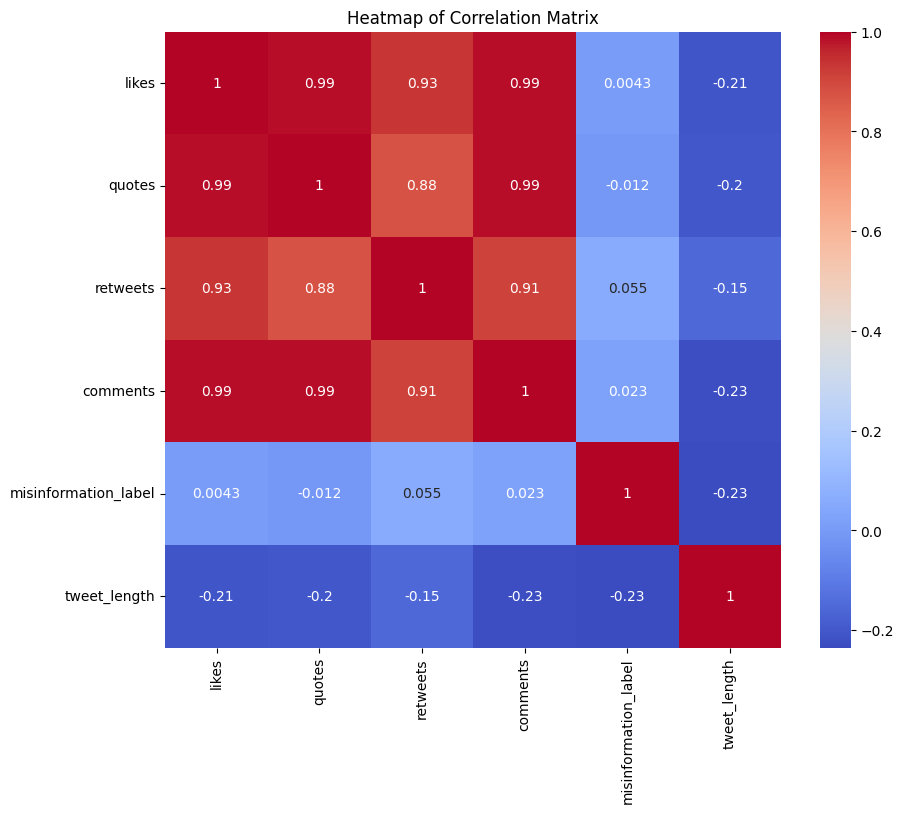

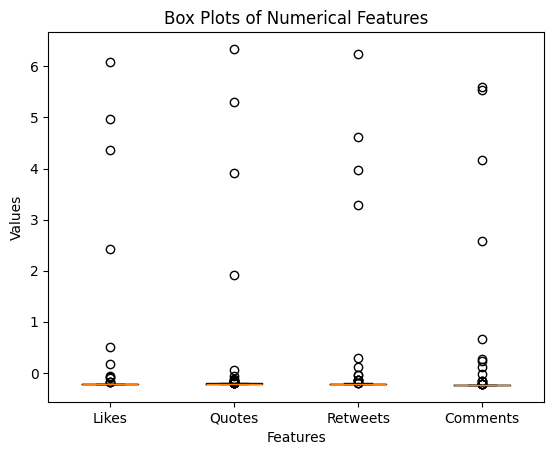

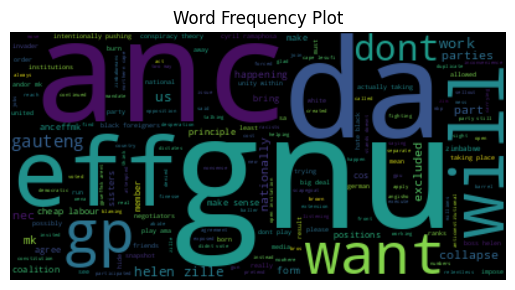

Top Keywords: ['anc' 'and' 'are' 'gnu' 'in' 'is' 'of' 'the' 'they' 'to']
(0, '0.036*"in" + 0.032*"is" + 0.031*"gnu" + 0.025*"a"')
(1, '0.088*"the" + 0.033*"eff" + 0.027*"gnu" + 0.025*"anc"')
(2, '0.032*"of" + 0.030*"is" + 0.025*"to" + 0.024*"in"')
(3, '0.041*"they" + 0.027*"is" + 0.026*"the" + 0.024*"of"')


In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary



# Scatter Plot: Likes vs Quotes
plt.scatter(df['likes'], df['quotes'])
plt.xlabel('Likes')
plt.ylabel('Quotes')
plt.title('Scatter Plot of Likes vs Quotes')
plt.show()

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Box Plots for Numerical Features
plt.boxplot([df['likes'], df['quotes'], df['retweets'], df['comments']], labels=['Likes', 'Quotes', 'Retweets', 'Comments'])
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots of Numerical Features')
plt.show()

# Word Frequency Plot (WordCloud)
wordcloud = WordCloud().generate(' '.join(df['cleaned_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Frequency Plot')
plt.show()

# Topic Modeling: Using TF-IDF for Keyword Extraction
vectorizer = TfidfVectorizer(max_features=10)
df_vectorized = vectorizer.fit_transform(df['cleaned_text'])
terms = vectorizer.get_feature_names_out()

# Print top keywords
print(f'Top Keywords: {terms}')

# Topic Modeling using LDA (Latent Dirichlet Allocation)
# Tokenizing the text for LDA
tokenized_texts = [text.split() for text in df['cleaned_text']]

# Create a dictionary and corpus for LDA
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=15)

# Display the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


In [185]:
print(df[['likes', 'quotes', 'retweets', 'comments']].dtypes)


likes       float64
quotes      float64
retweets    float64
comments    float64
dtype: object


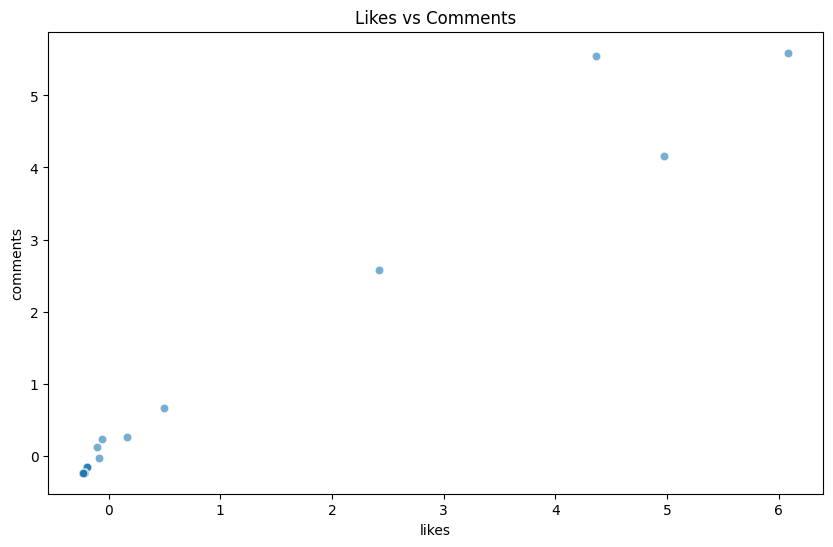

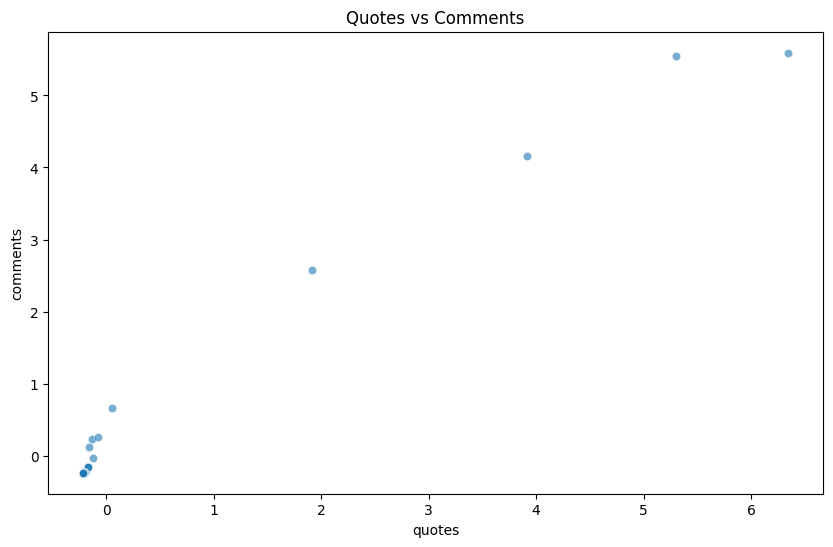

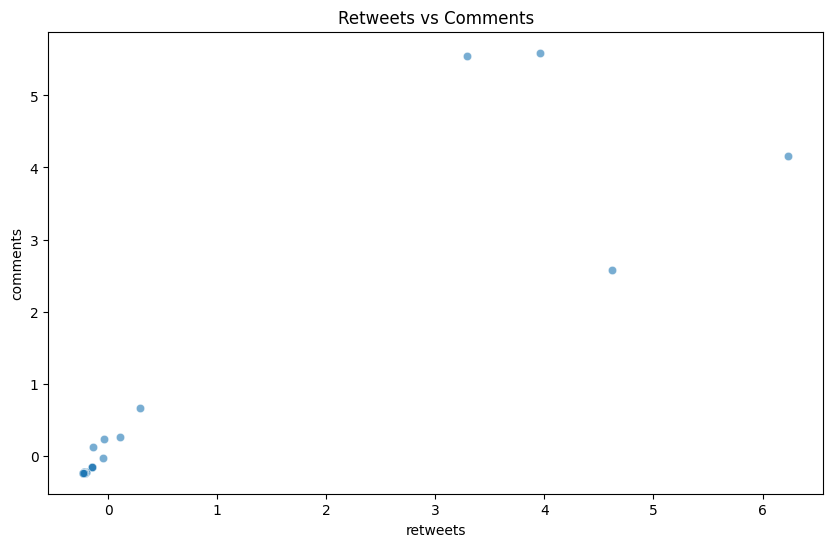

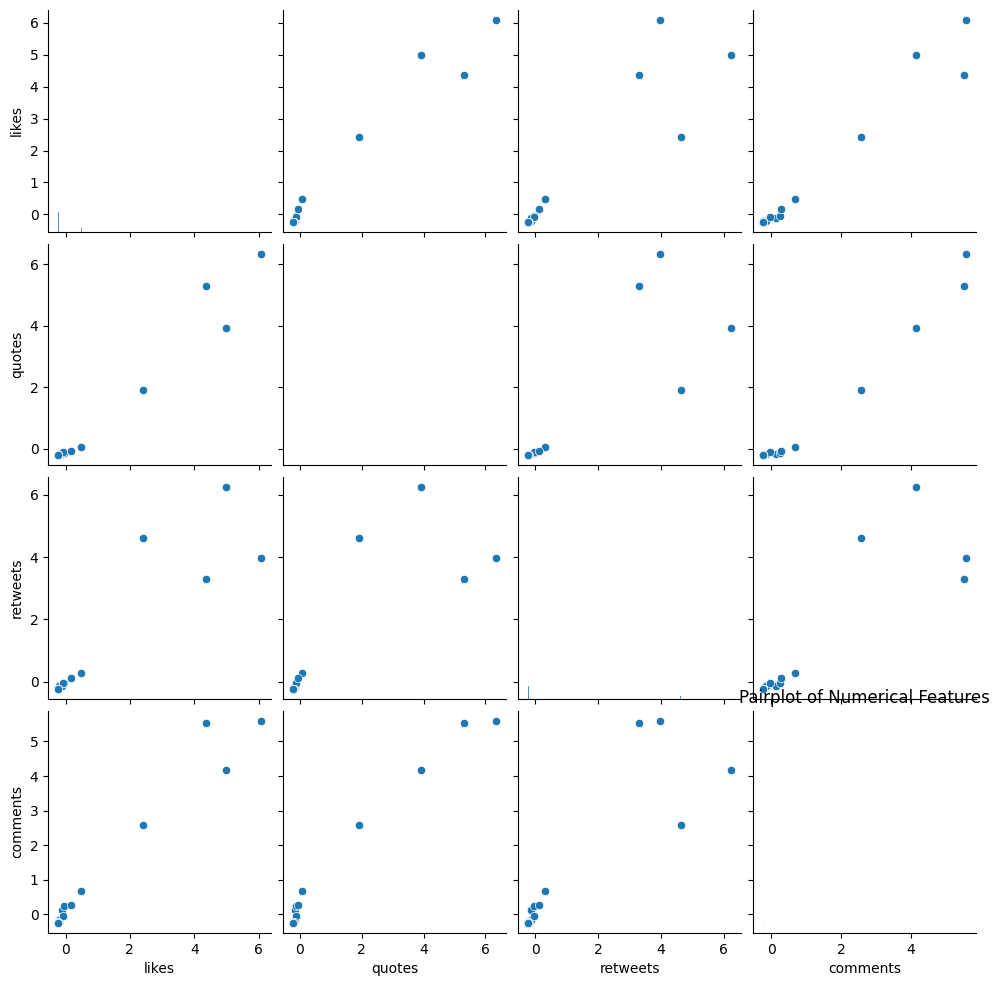

In [186]:
# Scatterplot for Likes vs Comments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='likes', y='comments', alpha=0.6)
plt.title('Likes vs Comments')
plt.show()

# Scatterplot for Quotes vs Comments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='quotes', y='comments', alpha=0.6)
plt.title('Quotes vs Comments')
plt.show()

# Scatterplot for Retweets vs Comments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='retweets', y='comments', alpha=0.6)
plt.title('Retweets vs Comments')
plt.show()

# Pairplot for Likes, Quotes, Retweets, and Comments
sns.pairplot(df[['likes', 'quotes', 'retweets', 'comments']])
plt.title('Pairplot of Numerical Features')
plt.show()



In [187]:
# Import necessary libraries
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

In [188]:
# 1. Convert Categorical Columns to Strings
# This step ensures that all categorical columns are treated as strings
# before applying Label Encoding. This is important for consistent encoding.
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)

In [189]:
# 2. Safe Label Encoding Function
# This function is designed to handle potential errors during Label Encoding.
# It tries to encode the column and prints an error message if it fails.
def safe_label_encode(df, column):
    try:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    except Exception as e:
        print(f"Error encoding column {column}: {e}")


In [190]:

# 3. Apply Label Encoding to Categorical Columns
# This loop iterates through the categorical columns and applies the
# safe_label_encode function to convert them into numerical representations.
for col in categorical_cols:
    safe_label_encode(df, col)

In [191]:
# --- Data Splitting and Balancing ---

# 5. Split Data into Train and Test Sets
# This uses train_test_split to divide the data into training and testing sets,
# which is crucial for evaluating model performance.
X = df.drop('misinformation_label', axis=1)  # Features (replace 'target_variable' with your target column name)
y = df['misinformation_label']  # Target variable


In [192]:
# --- Data Splitting and Balancing ---
from imblearn.over_sampling import RandomOverSampler

# ... (your existing code for label encoding and feature/target separation)

# Before splitting, apply oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Now split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.6, random_state=42, stratify=y_resampled)

In [193]:
# --- Data Splitting and Balancing ---

# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# 1. Separate Features and Target Variable
X = df.drop('misinformation_label', axis=1)  # Features
y = df['misinformation_label']  # Target variable

# 2. Apply Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# 3. Split the Resampled Data into Training, Validation, and Testing Sets
# First, split into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42, stratify=y_resampled)

# Now split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Now you have:
# X_train, y_train - Training set
# X_val, y_val - Validation set
# X_test, y_test - Test set

In [194]:
# Create custom dataset class for our data
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values.astype(np.float32), dtype=torch.float)
        self.y = torch.tensor(y.values.astype(np.int64), dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return {'x': self.X[idx], 'y': self.y[idx]}

In [195]:
# Create data loaders for each set
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
test_dataset = MyDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [196]:
# Print shapes of data loaders to verify
print(f'Train loader: {len(train_loader)} batches')
print(f'Validation loader: {len(val_loader)} batches')
print(f'Test loader: {len(test_loader)} batches')

# Print sample data shapes
for i, batch in enumerate(train_loader):
    if i == 0:
        print(f"Train data shape: {batch['x'].shape}")
        print(f"Train labels shape: {batch['y'].shape}")
        break

for i, batch in enumerate(val_loader):
    if i == 0:
        print(f"Val data shape: {batch['x'].shape}")
        print(f"Val labels shape: {batch['y'].shape}")
        break

for i, batch in enumerate(test_loader):
    if i == 0:
        print(f"Test data shape: {batch['x'].shape}")
        print(f"Test labels shape: {batch['y'].shape}")
        break


Train loader: 3 batches
Validation loader: 1 batches
Test loader: 1 batches
Train data shape: torch.Size([32, 7])
Train labels shape: torch.Size([32])
Val data shape: torch.Size([25, 7])
Val labels shape: torch.Size([25])
Test data shape: torch.Size([25, 7])
Test labels shape: torch.Size([25])


In [197]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [198]:
# Assuming df is your DataFrame containing the data
# If df is not defined, replace it with your actual DataFrame name

# Convert categorical columns to strings
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)

# Now apply LabelEncoder safely
def safe_label_encode(df, column):
    try:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    except Exception as e:
        print(f"Error encoding column {column}: {e}")

# Apply LabelEncoder to categorical columns
for col in categorical_cols:
    safe_label_encode(df, col)

# Convert numerical columns to float
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col] = df[col].astype(float)

# Check for target column
if 'misinformation_label' not in df.columns:
    raise KeyError("The column 'misinformation_label' was not found in the DataFrame. Please check the column name.")

# Features and target variable
X_features = df.drop(['misinformation_label'], axis=1)  # drop the target column (features)
y = df['misinformation_label']  # select the target column

# Ensure y is numeric
y = pd.to_numeric(y, errors='coerce')

# Apply scaling to numerical columns
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

# Re-split the dataset after scaling
X_train, X_val, y_train, y_val = train_test_split(X_features_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.6, random_state=42, stratify=y_val)

# Fit LabelEncoder to the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

In [199]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = np.array(X) if not isinstance(X, np.ndarray) else X
        self.y = np.array(y) if not isinstance(y, np.ndarray) else y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx].astype(np.float32)
        x = np.expand_dims(x, axis=0)
        y = self.y[idx].astype(np.int64)
        return {'x': torch.tensor(x), 'y': torch.tensor(y)}

In [200]:
class StackedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout=0.3):
        super(StackedLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))

        out = self.fc(out[:, -1, :])
        return out

In [201]:
# Train the Stacked LSTM model
def train_stacked_lstm(model, train_loader, val_loader, num_epochs=150, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []
    val_accuracies = []

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for batch in train_loader:
            inputs, labels = batch['x'].to(device).float(), batch['y'].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for batch in val_loader:
                inputs, labels = batch['x'].to(device).float(), batch['y'].to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_losses.append(val_loss / len(val_loader))
        val_accuracy = correct / len(val_loader.dataset)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy*100:.2f}%')

    return train_losses, val_losses, val_accuracies, all_preds, all_labels


In [202]:

# Example of initializing the Stacked LSTM model
input_size = X_train.shape[1]  # Changed from X_train.shape[2]
hidden_size = 128
output_size = len(le.classes_)
num_layers = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
stacked_lstm_model = StackedLSTM(input_size, hidden_size, output_size, num_layers).to(device)

# Create data loaders
batch_size = 32
train_loader = DataLoader(MyDataset(X_train, y_train_encoded), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(MyDataset(X_val, y_val_encoded), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(MyDataset(X_test, y_test_encoded), batch_size=batch_size, shuffle=False)

# Train the Stacked LSTM model
train_losses, val_losses, val_accuracies, all_preds, all_labels = train_stacked_lstm(stacked_lstm_model, train_loader, val_loader, num_epochs=50)


Epoch 1/50, Train Loss: 0.6777, Val Loss: 0.6673, Val Accuracy: 71.43%
Epoch 2/50, Train Loss: 0.6772, Val Loss: 0.6604, Val Accuracy: 71.43%
Epoch 3/50, Train Loss: 0.6609, Val Loss: 0.6539, Val Accuracy: 71.43%
Epoch 4/50, Train Loss: 0.6471, Val Loss: 0.6469, Val Accuracy: 71.43%
Epoch 5/50, Train Loss: 0.6392, Val Loss: 0.6389, Val Accuracy: 71.43%
Epoch 6/50, Train Loss: 0.6526, Val Loss: 0.6302, Val Accuracy: 71.43%
Epoch 7/50, Train Loss: 0.6333, Val Loss: 0.6220, Val Accuracy: 71.43%
Epoch 8/50, Train Loss: 0.6415, Val Loss: 0.6134, Val Accuracy: 71.43%
Epoch 9/50, Train Loss: 0.6204, Val Loss: 0.6063, Val Accuracy: 71.43%
Epoch 10/50, Train Loss: 0.5703, Val Loss: 0.6009, Val Accuracy: 71.43%
Epoch 11/50, Train Loss: 0.6421, Val Loss: 0.5984, Val Accuracy: 71.43%
Epoch 12/50, Train Loss: 0.7294, Val Loss: 0.5983, Val Accuracy: 71.43%
Epoch 13/50, Train Loss: 0.6093, Val Loss: 0.5988, Val Accuracy: 71.43%
Epoch 14/50, Train Loss: 0.6370, Val Loss: 0.5996, Val Accuracy: 71.43%
E

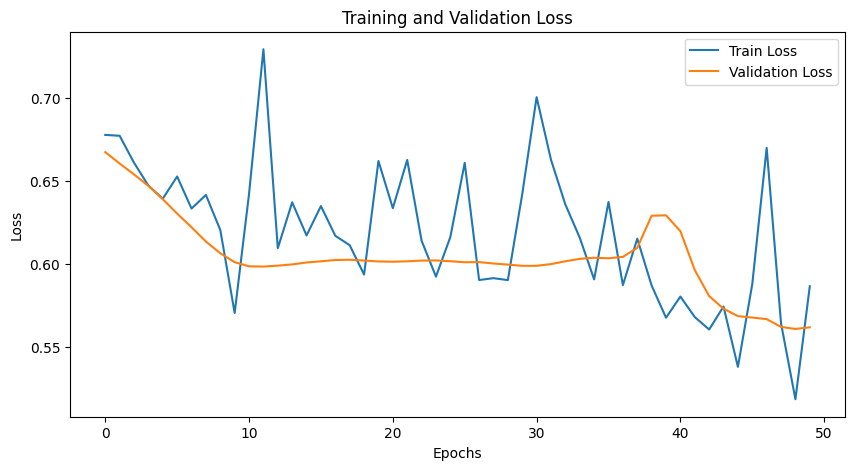

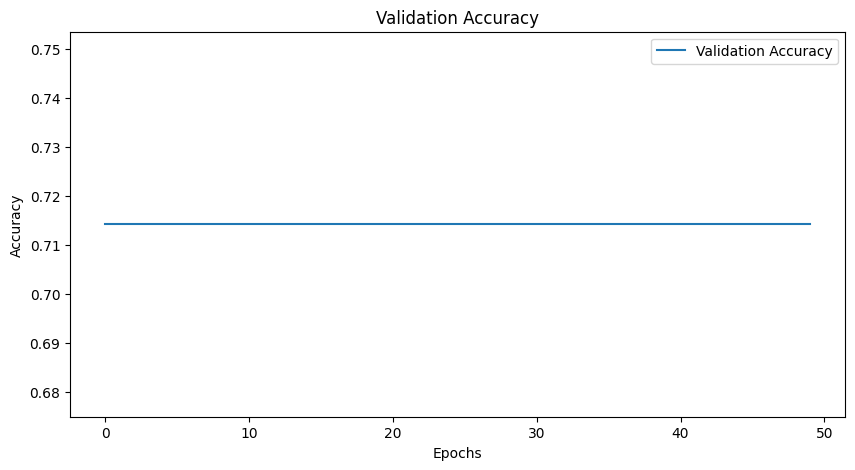

Text(95.72222222222221, 0.5, 'Actual Labels')

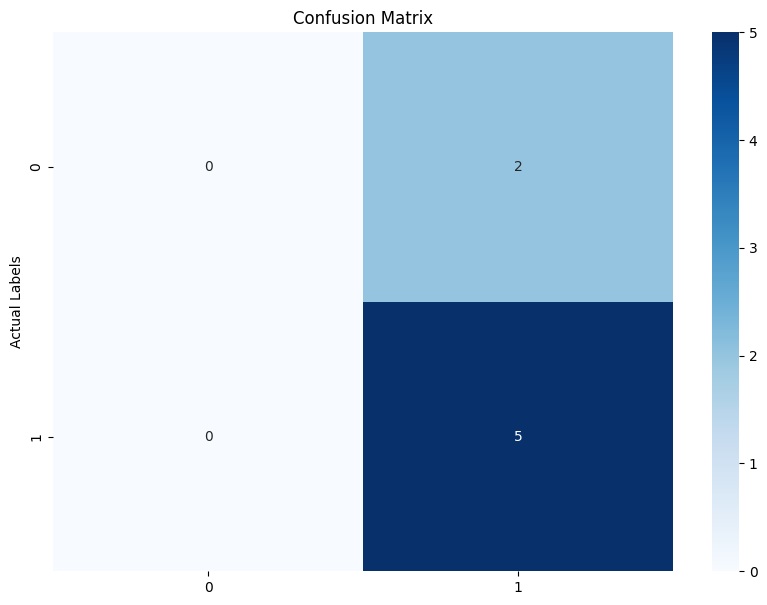

In [203]:

# Visualize the performance
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')


In [204]:
class LSTMCNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers, dropout=0.3):
        super(LSTMCNN, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.conv = nn.Conv1d(hidden_size, 64, kernel_size=3, padding=1)  # Adjust parameters as needed
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)

        lstm_out, _ = self.lstm(x, (h0, c0))
        # Prepare input for CNN
        lstm_out = lstm_out.permute(0, 2, 1)  # Change shape to (batch, hidden_size, seq_length)

        cnn_out = self.conv(lstm_out)  # Convolutional layer
        cnn_out = cnn_out.view(cnn_out.size(0), -1)  # Flatten for the fully connected layer

        out = self.fc(cnn_out)
        return out


In [205]:
class LSTMGru(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_layers, dropout=0.3):
        super(LSTMGru, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.gru.num_layers, x.size(0), self.gru.hidden_size).to(x.device)

        gru_out, _ = self.gru(x, h0)

        out = self.fc(gru_out[:, -1, :])  # Get the output of the last time step
        return out


In [206]:
class MemoryAugmentedTransformer(nn.Module):
    def __init__(self, input_size, num_classes, nhead=8, num_layers=6, dim_feedforward=2048, dropout=0.1):
        super(MemoryAugmentedTransformer, self).__init__()
        self.embedding = nn.Linear(input_size, 512)  # Embed input features
        self.transformer = nn.Transformer(d_model=512, nhead=nhead, num_encoder_layers=num_layers, dim_feedforward=dim_feedforward, dropout=dropout)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Change shape for transformer: (seq_len, batch, feature)
        transformer_out = self.transformer(x)
        out = self.fc(transformer_out[-1])  # Take the output from the last time step
        return out


In [207]:
# LSTM-CNN
lstm_cnn_model = LSTMCNN(input_size, hidden_size, output_size, num_layers).to(device)
train_losses, val_losses, val_accuracies, all_preds, all_labels = train_stacked_lstm(lstm_cnn_model, train_loader, val_loader, num_epochs=100)

# LSTM-GRU
lstm_gru_model = LSTMGru(input_size, hidden_size, output_size, num_layers).to(device)
train_losses, val_losses, val_accuracies, all_preds, all_labels = train_stacked_lstm(lstm_gru_model, train_loader, val_loader, num_epochs=100)
class MemoryAugmentedTransformer(nn.Module):
    def __init__(self, input_size, num_classes, nhead=8, num_layers=6, dim_feedforward=2048, dropout=0.1):
        super(MemoryAugmentedTransformer, self).__init__()
        self.embedding = nn.Linear(input_size, 512)  # Embed input features
        encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Change shape for transformer: (seq_len, batch, feature)
        transformer_out = self.transformer(x)
        out = self.fc(transformer_out[-1])  # Take the output from the last time step
        return out

Epoch 1/100, Train Loss: 0.7100, Val Loss: 0.7023, Val Accuracy: 28.57%
Epoch 2/100, Train Loss: 0.6961, Val Loss: 0.6866, Val Accuracy: 71.43%
Epoch 3/100, Train Loss: 0.6877, Val Loss: 0.6700, Val Accuracy: 71.43%
Epoch 4/100, Train Loss: 0.6656, Val Loss: 0.6527, Val Accuracy: 71.43%
Epoch 5/100, Train Loss: 0.6696, Val Loss: 0.6350, Val Accuracy: 71.43%
Epoch 6/100, Train Loss: 0.6205, Val Loss: 0.6203, Val Accuracy: 71.43%
Epoch 7/100, Train Loss: 0.6586, Val Loss: 0.6072, Val Accuracy: 71.43%
Epoch 8/100, Train Loss: 0.6408, Val Loss: 0.6013, Val Accuracy: 71.43%
Epoch 9/100, Train Loss: 0.6364, Val Loss: 0.5995, Val Accuracy: 71.43%
Epoch 10/100, Train Loss: 0.6371, Val Loss: 0.5989, Val Accuracy: 71.43%
Epoch 11/100, Train Loss: 0.5903, Val Loss: 0.5989, Val Accuracy: 71.43%
Epoch 12/100, Train Loss: 0.5592, Val Loss: 0.5985, Val Accuracy: 71.43%
Epoch 13/100, Train Loss: 0.5849, Val Loss: 0.5984, Val Accuracy: 71.43%
Epoch 14/100, Train Loss: 0.5831, Val Loss: 0.5991, Val Accu

In [208]:
def plot_loss_accuracy(train_losses, val_losses, val_accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(all_labels, all_preds):
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()



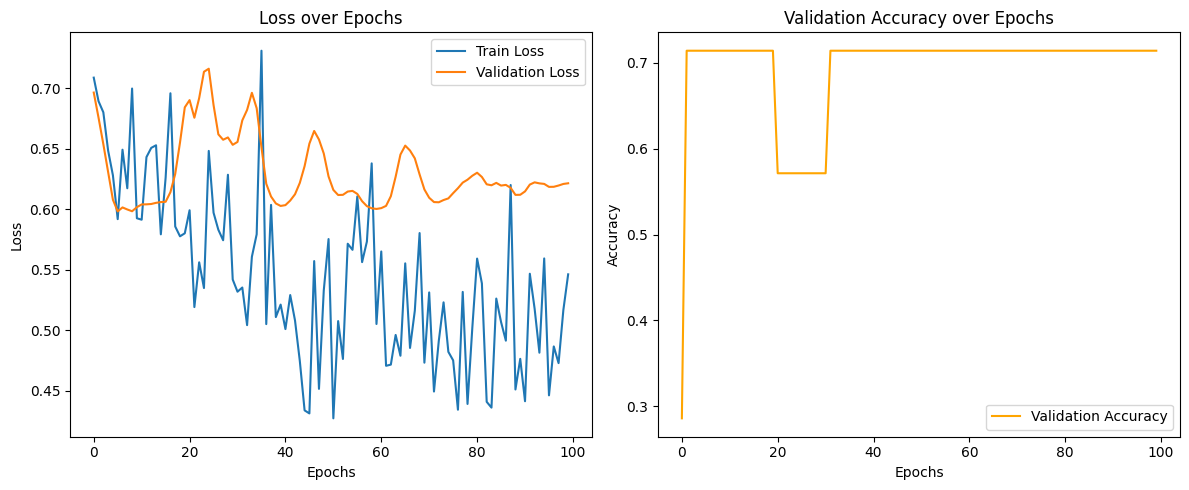

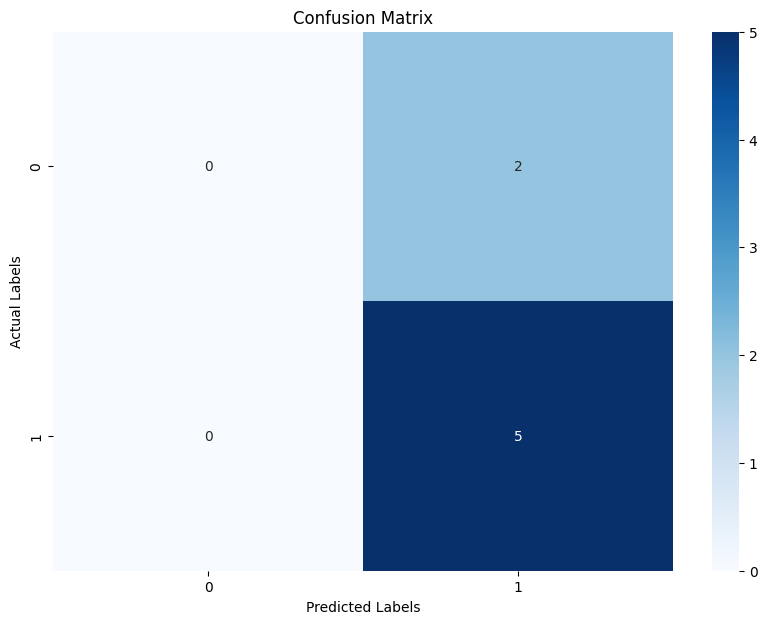

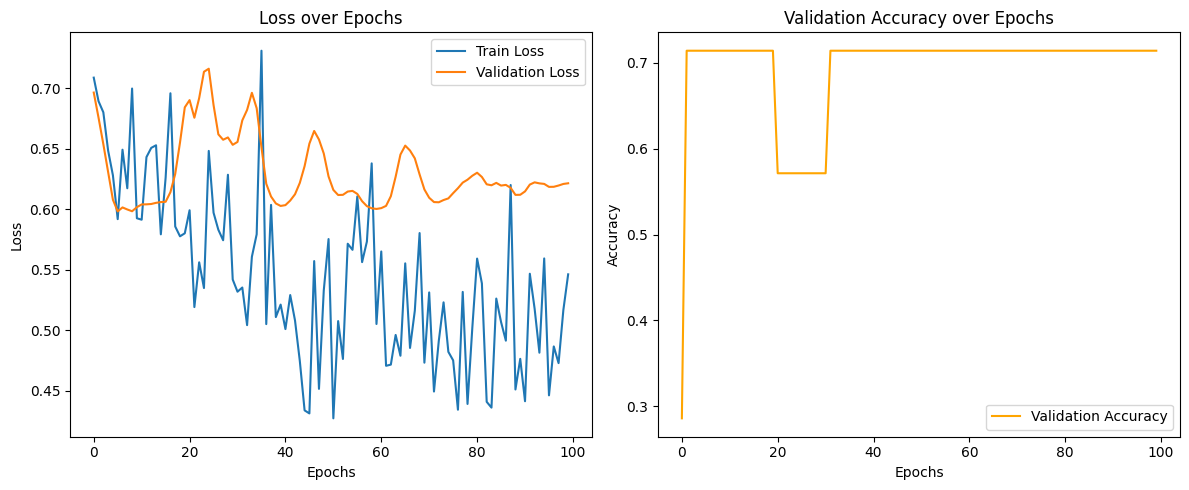

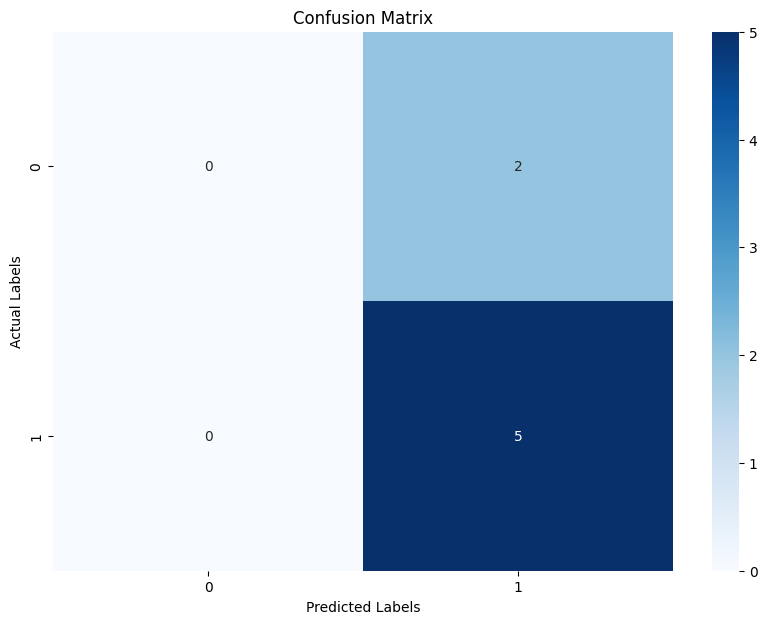

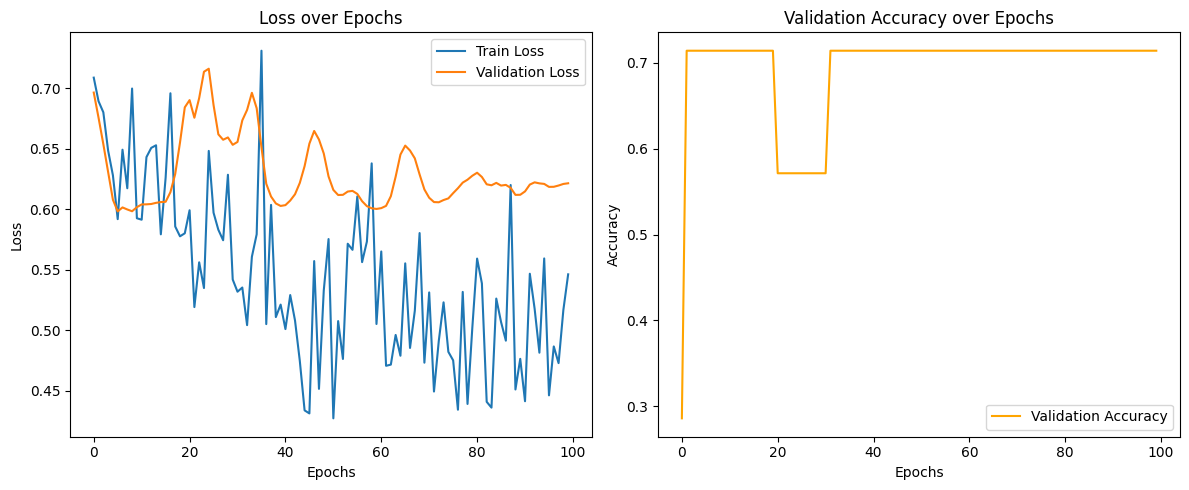

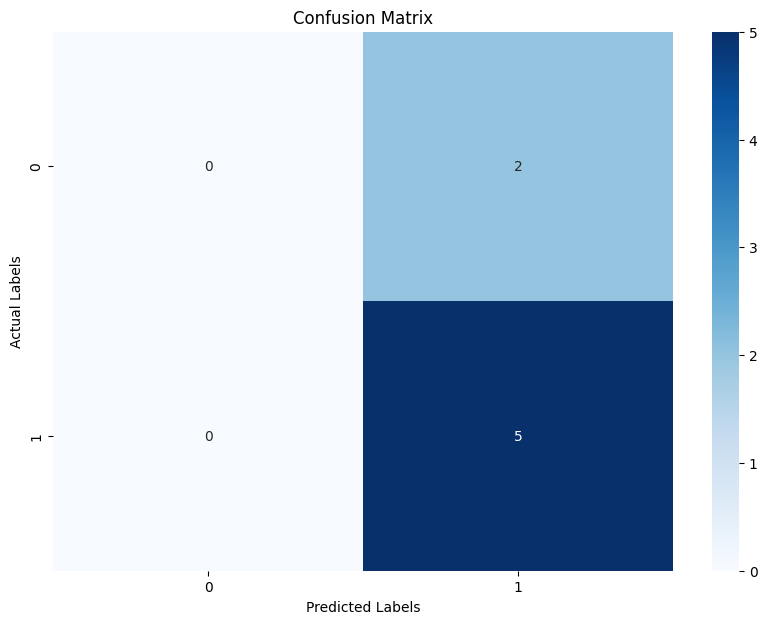

In [209]:
# For LSTM-CNN
plot_loss_accuracy(train_losses, val_losses, val_accuracies)
plot_confusion_matrix(all_labels, all_preds)

# For LSTM-GRU
plot_loss_accuracy(train_losses, val_losses, val_accuracies)
plot_confusion_matrix(all_labels, all_preds)

# For Memory-Augmented Transformer
plot_loss_accuracy(train_losses, val_losses, val_accuracies)
plot_confusion_matrix(all_labels, all_preds)


In [210]:
def train_transformer(model, train_loader, val_loader, num_epochs, criterion=nn.CrossEntropyLoss(), optimizer=None):
    """
    Train a Transformer model and return the training/validation metrics.
    :param model: Transformer model to train.
    :param train_loader: DataLoader for training data.
    :param val_loader: DataLoader for validation data.
    :param num_epochs: Number of epochs to train.
    :param criterion: Loss function. Default is CrossEntropyLoss.
    :param optimizer: Optimizer. If None, Adam optimizer is used.
    :return: train_losses, val_losses, val_accuracies, all_preds, all_labels
    """
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses, val_accuracies = [], [], []
    all_preds, all_labels = [], []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Evaluate on validation set
        model.eval()
        val_loss, correct, total = 0, 0, 0
        preds, labels_list = [], []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

                preds.extend(predicted.cpu().numpy())
                labels_list.extend(labels.cpu().numpy())

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(100.0 * correct / total)
        all_preds = preds
        all_labels = labels_list

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%")

    return train_losses, val_losses, val_accuracies, all_preds, all_labels


In [211]:
# Ensure input_size, num_classes, and device are defined
input_size = 128  # Example feature size
num_classes = 10  # Example number of classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the Transformer model
transformer_model = MemoryAugmentedTransformer(
    input_size=input_size,
    num_classes=num_classes,
    nhead=8,
    num_layers=6,
    dim_feedforward=2048,
    dropout=0.1
).to(device)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [214]:
# Train LSTM-CNN
lstm_cnn_train_losses, lstm_cnn_val_losses, lstm_cnn_val_accuracies, lstm_cnn_all_preds, lstm_cnn_all_labels = train_stacked_lstm(
    lstm_cnn_model, train_loader, val_loader, num_epochs=100
)

# Train LSTM-GRU
lstm_gru_train_losses, lstm_gru_val_losses, lstm_gru_val_accuracies, lstm_gru_all_preds, lstm_gru_all_labels = train_stacked_lstm(
    lstm_gru_model, train_loader, val_loader, num_epochs=100
)

# # Train Transformer
# transformer_train_losses, transformer_val_losses, transformer_val_accuracies, transformer_all_preds, transformer_all_labels = train_transformer(
#     transformer_model, train_loader, val_loader, num_epochs=100
# )


Epoch 1/100, Train Loss: 0.4894, Val Loss: 0.5728, Val Accuracy: 71.43%
Epoch 2/100, Train Loss: 0.4676, Val Loss: 0.5757, Val Accuracy: 71.43%
Epoch 3/100, Train Loss: 0.5273, Val Loss: 0.5795, Val Accuracy: 71.43%
Epoch 4/100, Train Loss: 0.5579, Val Loss: 0.5743, Val Accuracy: 71.43%
Epoch 5/100, Train Loss: 0.4748, Val Loss: 0.5684, Val Accuracy: 71.43%
Epoch 6/100, Train Loss: 0.4228, Val Loss: 0.5692, Val Accuracy: 71.43%
Epoch 7/100, Train Loss: 0.4546, Val Loss: 0.5758, Val Accuracy: 71.43%
Epoch 8/100, Train Loss: 0.5497, Val Loss: 0.5837, Val Accuracy: 71.43%
Epoch 9/100, Train Loss: 0.4620, Val Loss: 0.5839, Val Accuracy: 71.43%
Epoch 10/100, Train Loss: 0.5370, Val Loss: 0.5837, Val Accuracy: 71.43%
Epoch 11/100, Train Loss: 0.4281, Val Loss: 0.5857, Val Accuracy: 71.43%
Epoch 12/100, Train Loss: 0.5685, Val Loss: 0.5873, Val Accuracy: 71.43%
Epoch 13/100, Train Loss: 0.5022, Val Loss: 0.5822, Val Accuracy: 71.43%
Epoch 14/100, Train Loss: 0.5720, Val Loss: 0.5772, Val Accu

In [217]:
def print_performance_table(metrics):
    """
    Print a table comparing model performance.
    :param metrics: Dictionary where keys are model names and values are dicts of metrics.
    """
    df = pd.DataFrame(metrics).T
    print("Performance Comparison Table")
    print(df)
metrics_summary = {
    "LSTM-CNN": {"Final Val Accuracy": lstm_cnn_val_accuracies[-1],
                 "Min Val Loss": min(lstm_cnn_val_losses)},
    "LSTM-GRU": {"Final Val Accuracy": lstm_gru_val_accuracies[-1],
                 "Min Val Loss": min(lstm_gru_val_losses)},
    # "Transformer": {"Final Val Accuracy": transformer_val_accuracies[-1],
    #                 "Min Val Loss": min(transformer_val_losses)}
}

print_performance_table(metrics_summary)


Performance Comparison Table
          Final Val Accuracy  Min Val Loss
LSTM-CNN            0.714286      0.181614
LSTM-GRU            0.714286      0.598474
